In [ ]:
# Ab-Initio Solution of the Hydrogen Atom

Computational Modeling and Simulation of Materials

This project solves the radial Schrödinger equation of the hydrogen atom 
using finite difference discretization in atomic units.

In [ ]:
## Theory

The radial Schrödinger equation for hydrogen (l = 0) in atomic units:

-1/2 d²u/dr² - 1/r u = E u

where:

u(r) = r R(r)

The equation is discretized using the finite difference method and 
solved as a matrix eigenvalue problem.

Computed Energy: -0.499971878163403
Exact Energy   : -0.500000 Hartree


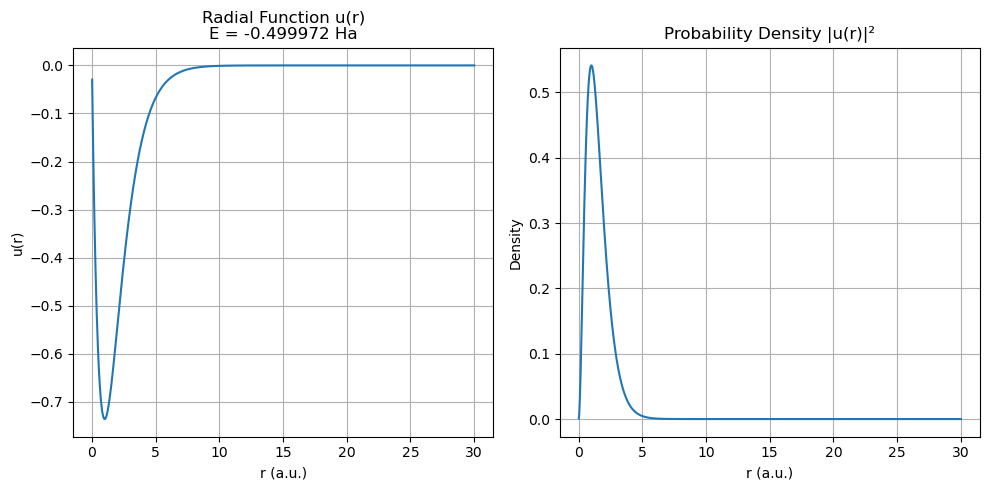

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

class HydrogenSolver:
    def __init__(self, r_max=30.0, N=2000):
        r_full = np.linspace(0, r_max, N + 1)
        self.r = r_full[1:]
        self.dr = self.r[1] - self.r[0]
        self.N = len(self.r)

        self.energy = None
        self.u = None

    def solve(self):
        V = -1.0 / self.r

        main_diag = (1.0 / self.dr**2) + V
        off_diag = (-0.5 / self.dr**2) * np.ones(self.N - 1)

        energies, wavefuncs = eigh_tridiagonal(main_diag, off_diag)

        self.energy = energies[0]

        raw_u = wavefuncs[:, 0]
        norm = np.sqrt(np.trapezoid(raw_u**2, self.r))
        self.u = raw_u / norm

        return self.energy

    def plot_results(self):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(self.r, self.u)
        plt.title(f"Radial Function u(r)\nE = {self.energy:.6f} Ha")
        plt.xlabel("r (a.u.)")
        plt.ylabel("u(r)")
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.plot(self.r, self.u**2)
        plt.title("Probability Density |u(r)|²")
        plt.xlabel("r (a.u.)")
        plt.ylabel("Density")
        plt.grid(True)

        plt.tight_layout()
        plt.show()

solver = HydrogenSolver(r_max=30, N=2000)
e0 = solver.solve()

print("Computed Energy:", e0)
print("Exact Energy   : -0.500000 Hartree")

solver.plot_results()

In [3]:
grid_sizes = [500, 1000, 1500, 2000, 3000]
energies = []

for N in grid_sizes:
    solver = HydrogenSolver(r_max=30, N=N)
    energies.append(solver.solve())

for N, E in zip(grid_sizes, energies):
    print(f"N = {N:4d}  Energy = {E:.6f}")

N =  500  Energy = -0.499551
N = 1000  Energy = -0.499888
N = 1500  Energy = -0.499950
N = 2000  Energy = -0.499972
N = 3000  Energy = -0.499988
